# HR Analysis Project

## Introduction

In this project, I have undertaken a comprehensive analysis of an HR dataset containing information on employee demographics, job details, salaries, performance scores, and more. The primary objectives of this analysis are to:

1. **Understand Workforce Dynamics**: Analyze trends related to hiring, employee retention, and performance across different departments and job titles.
2. **Identify Key Patterns**: Investigate potential disparities in salary, performance, and other metrics, particularly with regard to gender and age groups.
3. **Predictive Modeling**: Develop predictive models to forecast performance scores, employee turnover, and salary levels, using relevant features from the dataset.
4. **Provide Strategic Recommendations**: Based on the insights derived, offer actionable recommendations to improve HR policies, optimize hiring practices, and enhance employee retention strategies.

Through this analysis, the goal is to uncover meaningful insights that can inform decision-making and contribute to the overall success of the organization.


## Loading the Data

In [49]:
%matplotlib inline

In [51]:
import pandas as pd

# Load the HR dataset
hr_data = pd.read_csv('hr_dataset.csv', encoding='ascii')

# Display the first few rows of the dataset to understand its structure
print(hr_data.head())
print(hr_data.info())

   EmployeeID     EmployeeName  Department  \
0        1871   Robert Bonilla  Operations   
1        5639    Luis Erickson   Marketing   
2        3357    Ryan Sheppard          IT   
3        7397  Benjamin Taylor     Finance   
4        6009      Carl Foster          IT   

                               JobTitle    HireDate  Salary  Age  Gender  \
0                               Surgeon  2023-01-06   77912   46   Other   
1  Control and instrumentation engineer  2019-04-05   77091   43  Female   
2              Surveyor, rural practice  2015-03-05   81239   30    Male   
3                Politician's assistant  2022-10-30   44828   53   Other   
4                       Energy engineer  2016-12-28   79776   40    Male   

   PerformanceScore  YearsAtCompany  
0                 4               6  
1                 2               7  
2                 2               6  
3                 5               6  
4                 4               0  
<class 'pandas.core.frame.DataFrame'>


## Exploratory Data Analysis

Summary statistics for numerical columns:
        EmployeeID                    HireDate         Salary         Age  \
count   500.000000                         500     500.000000  500.000000   
mean   5514.592000  2019-09-05 06:37:26.400000   79092.340000   43.438000   
min    1000.000000         2014-08-31 00:00:00   40298.000000   22.000000   
25%    3534.750000         2017-02-03 12:00:00   59250.250000   33.000000   
50%    5482.000000         2019-08-24 00:00:00   79764.000000   43.000000   
75%    7406.250000         2022-04-04 06:00:00   97797.500000   54.000000   
max    9994.000000         2024-08-29 00:00:00  119863.000000   65.000000   
std    2463.033849                         NaN   22941.880485   12.649671   

       PerformanceScore  YearsAtCompany     HireYear   HireMonth  \
count        500.000000       500.00000   500.000000  500.000000   
mean           2.978000         4.60000  2019.186000    6.402000   
min            1.000000         0.00000  2014.000000    1.00

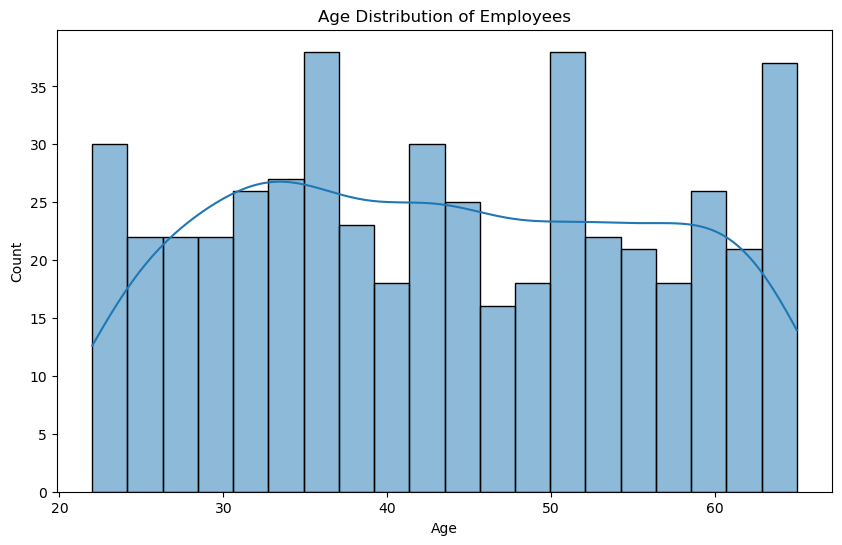

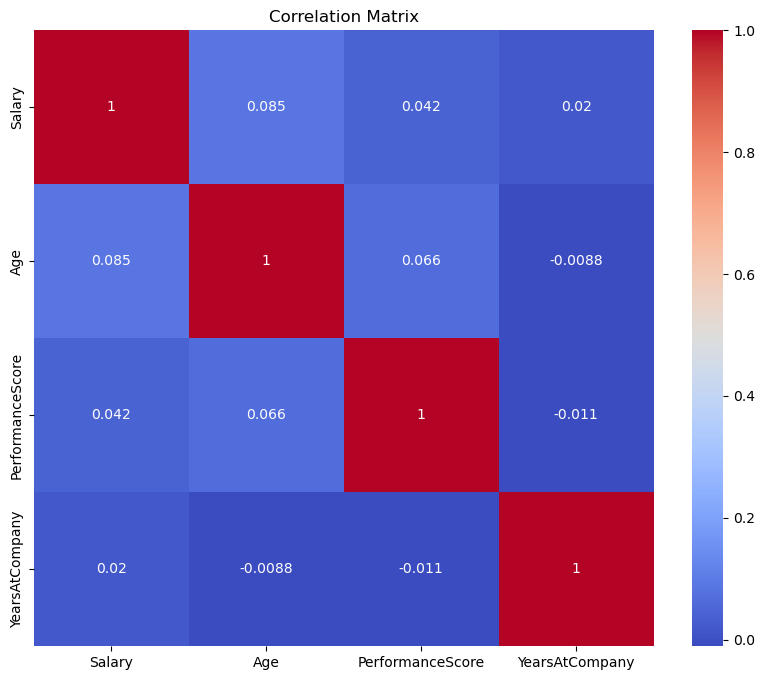

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Data cleaning
hr_data['HireDate'] = pd.to_datetime(hr_data['HireDate'])

# Summary statistics for numerical columns
numerical_summary = hr_data.describe()
print("Summary statistics for numerical columns:")
print(numerical_summary)

# Most common departments and job titles
print("\
Top 5 Departments:")
print(hr_data['Department'].value_counts().head())

print("\
Top 5 Job Titles:")
print(hr_data['JobTitle'].value_counts().head())

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(hr_data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('age_distribution.png')


print("\
Age distribution plot saved as 'age_distribution.png'")

# Calculate average salary by department
avg_salary_by_dept = hr_data.groupby('Department')['Salary'].mean().sort_values(ascending=False)
print("\
Average Salary by Department:")
print(avg_salary_by_dept)

# Calculate average performance score by gender
avg_performance_by_gender = hr_data.groupby('Gender')['PerformanceScore'].mean().sort_values(ascending=False)
print("\
Average Performance Score by Gender:")
print(avg_performance_by_gender)

# Correlation matrix
correlation_matrix = hr_data[['Salary', 'Age', 'PerformanceScore', 'YearsAtCompany']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')


print("\
Correlation matrix plot saved as 'correlation_matrix.png'")

## Salary Analysis

Average Salary by Job Title (Top 10):
JobTitle
Secretary, company               119834.0
Accountant, chartered            119504.0
Archivist                        119180.0
Camera operator                  118841.0
Engineer, technical sales        117919.0
Paramedic                        117263.0
Tax inspector                    117095.0
Pharmacologist                   117031.5
Ranger/warden                    117010.0
Designer, television/film set    116823.0
Name: Salary, dtype: float64
One-way ANOVA test for salary differences between genders:
F-statistic: 0.10219552339925345
p-value: 0.9028719730136583
Average Salary by Gender:
Gender
Female    79765.206250
Other     78846.288462
Male      78715.847826
Name: Salary, dtype: float64


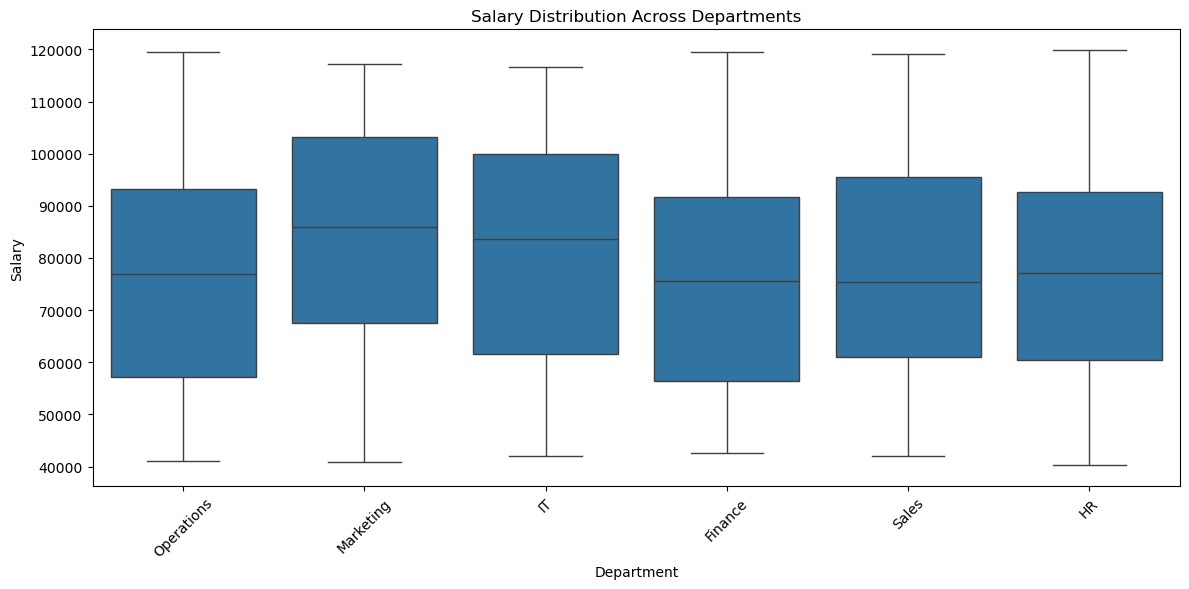

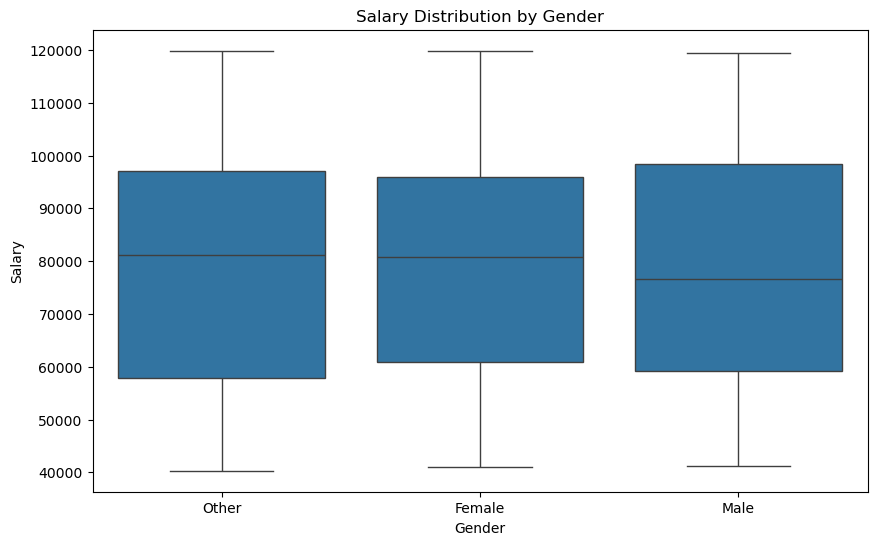

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Salary distribution across departments
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Salary', data=hr_data)
plt.title('Salary Distribution Across Departments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('salary_distribution_departments.png')


# Average salary by job title (top 10)
avg_salary_by_job = hr_data.groupby('JobTitle')['Salary'].mean().sort_values(ascending=False).head(10)
print("Average Salary by Job Title (Top 10):")
print(avg_salary_by_job)

# Salary differences between genders
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=hr_data)
plt.title('Salary Distribution by Gender')
plt.savefig('salary_distribution_gender.png')


# Statistical test for salary differences between genders
from scipy import stats

male_salaries = hr_data[hr_data['Gender'] == 'Male']['Salary']
female_salaries = hr_data[hr_data['Gender'] == 'Female']['Salary']
other_salaries = hr_data[hr_data['Gender'] == 'Other']['Salary']

f_statistic, p_value = stats.f_oneway(male_salaries, female_salaries, other_salaries)

print("\
One-way ANOVA test for salary differences between genders:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Average salary by gender
avg_salary_by_gender = hr_data.groupby('Gender')['Salary'].mean().sort_values(ascending=False)
print("\
Average Salary by Gender:")
print(avg_salary_by_gender)

## Performance Analysis

Average Performance Score by Department:
Department
Finance       3.210526
IT            3.159091
Operations    3.088889
Marketing     3.044944
Sales         2.671053
HR            2.483871
Name: PerformanceScore, dtype: float64
Correlation between Salary and Performance Score:
0.042478801650240657


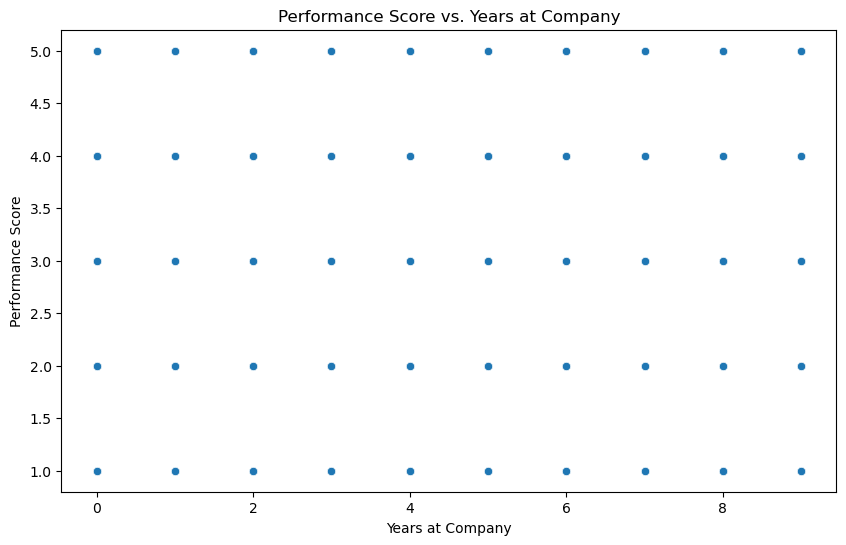

In [86]:
# Performance Analysis

# Patterns between performance scores and years at the company
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsAtCompany', y='PerformanceScore', data=hr_data)
plt.title('Performance Score vs. Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Performance Score')
plt.savefig('performance_vs_years.png')


# Average performance score by department
avg_performance_by_dept = hr_data.groupby('Department')['PerformanceScore'].mean().sort_values(ascending=False)
print("Average Performance Score by Department:")
print(avg_performance_by_dept)

# Correlation between salary and performance score
correlation_salary_performance = hr_data[['Salary', 'PerformanceScore']].corr().iloc[0, 1]
print("\
Correlation between Salary and Performance Score:")
print(correlation_salary_performance)

## Employee Tenure 

Average Years at Company by Department:
Department
Sales         5.434211
Marketing     4.808989
Finance       4.631579
Operations    4.488889
HR            4.354839
IT            3.920455
Name: YearsAtCompany, dtype: float64
Average Performance Score for Recently Hired Employees:
2.9458333333333333
Average Performance Score for All Employees:
2.978


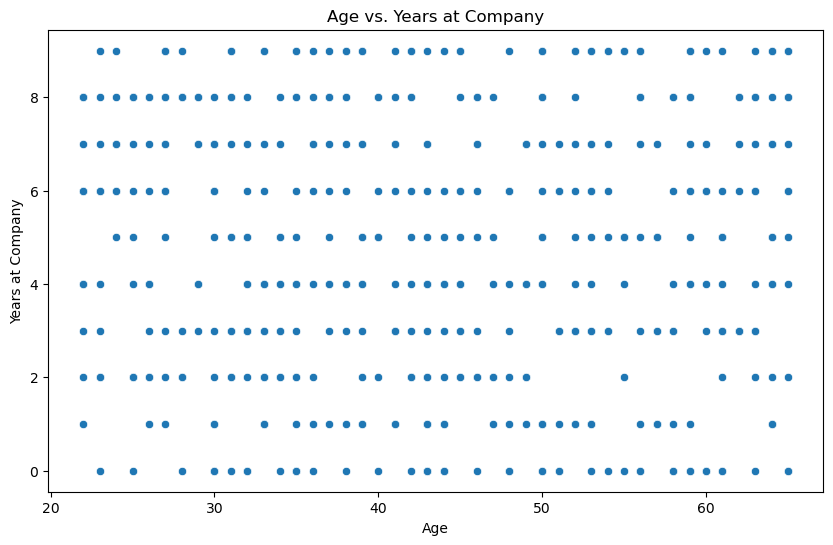

In [88]:
# Employee Tenure Analysis

# Average number of years employees stay at the company by department
avg_years_by_dept = hr_data.groupby('Department')['YearsAtCompany'].mean().sort_values(ascending=False)
print("Average Years at Company by Department:")
print(avg_years_by_dept)

# Relationship between age and years at the company
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='YearsAtCompany', data=hr_data)
plt.title('Age vs. Years at Company')
plt.xlabel('Age')
plt.ylabel('Years at Company')
plt.savefig('age_vs_years.png')


# Performance scores for recently hired employees
recent_hires = hr_data[hr_data['HireDate'] > '2020-01-01']
avg_performance_recent_hires = recent_hires['PerformanceScore'].mean()
print("\
Average Performance Score for Recently Hired Employees:")
print(avg_performance_recent_hires)

# Average performance score for all employees
avg_performance_all = hr_data['PerformanceScore'].mean()
print("\
Average Performance Score for All Employees:")
print(avg_performance_all)

## Gender Analysis

Salary Disparity by Job Title and Gender:
Gender                                  Female      Male    Other
JobTitle                                                         
Academic librarian                         NaN       NaN  47219.0
Accountant, chartered                      NaN  119504.0      NaN
Accountant, chartered management       99660.0       NaN      NaN
Accountant, chartered public finance  110110.0       NaN      NaN
Actor                                      NaN   59960.0      NaN
...                                        ...       ...      ...
Veterinary surgeon                         NaN   43053.0      NaN
Warden/ranger                              NaN   75812.0      NaN
Web designer                               NaN       NaN  49196.0
Writer                                 51872.0       NaN      NaN
Youth worker                           95812.0   54255.0      NaN

[343 rows x 3 columns]


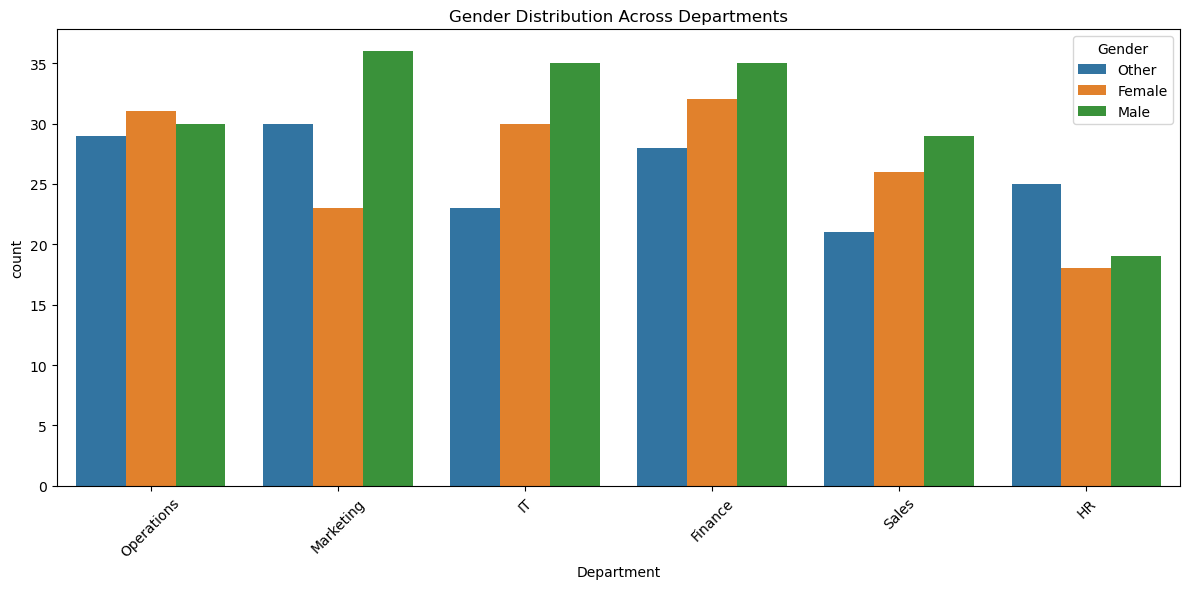

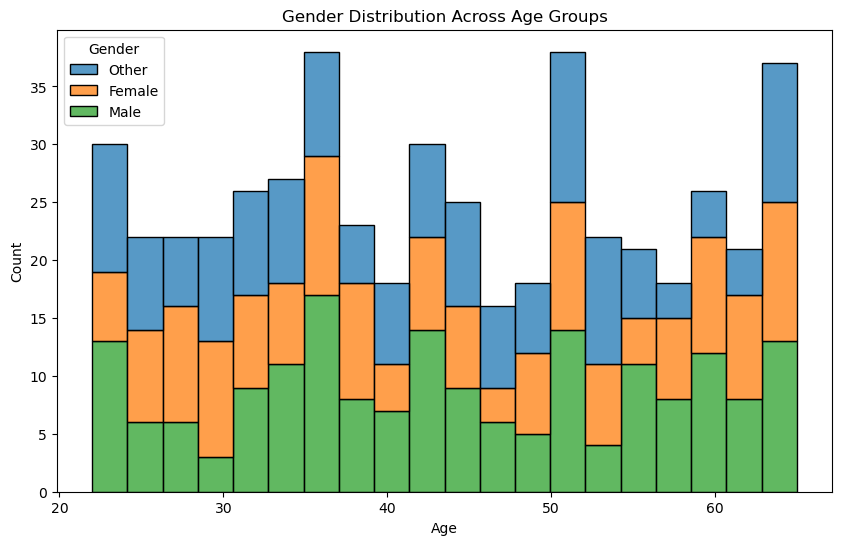

In [90]:
# Gender Analysis

# Gender distribution across different departments
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='Gender', data=hr_data)
plt.title('Gender Distribution Across Departments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('gender_distribution_departments.png')


# Gender disparity in salaries within the same job title
salary_disparity = hr_data.groupby(['JobTitle', 'Gender'])['Salary'].mean().unstack()
print("Salary Disparity by Job Title and Gender:")
print(salary_disparity)

# Gender distribution across different age groups
plt.figure(figsize=(10, 6))
sns.histplot(data=hr_data, x='Age', hue='Gender', multiple='stack', bins=20)
plt.title('Gender Distribution Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('gender_distribution_age.png')


## Hiring Trends

Department with most hires in the last 5 years:
Department
Operations    47
IT            43
Finance       42
Sales         41
Marketing     38
HR            37
Name: count, dtype: int64


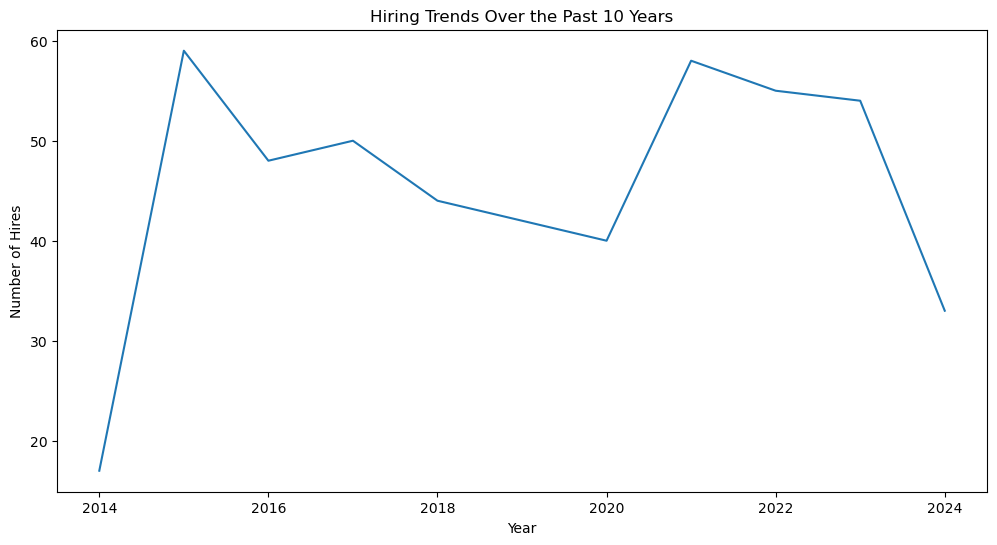

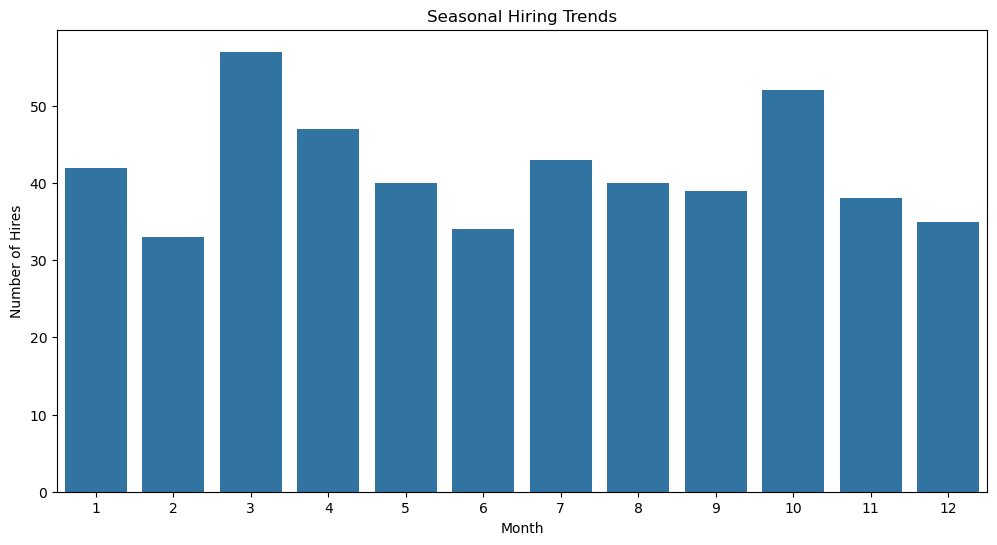

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Convert HireDate to datetime
hr_data['HireDate'] = pd.to_datetime(hr_data['HireDate'])

# Hiring trends over the past 10 years
plt.figure(figsize=(12, 6))
hr_data['HireYear'] = hr_data['HireDate'].dt.year
yearly_hires = hr_data['HireYear'].value_counts().sort_index()
sns.lineplot(x=yearly_hires.index, y=yearly_hires.values)
plt.title('Hiring Trends Over the Past 10 Years')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.savefig('hiring_trends.png')


# Department with most hires in the last 5 years
five_years_ago = datetime.now() - timedelta(days=5*365)
recent_hires = hr_data[hr_data['HireDate'] > five_years_ago]
dept_hires = recent_hires['Department'].value_counts()
print("Department with most hires in the last 5 years:")
print(dept_hires)

# Seasonal trends in hiring
hr_data['HireMonth'] = hr_data['HireDate'].dt.month
monthly_hires = hr_data['HireMonth'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_hires.index, y=monthly_hires.values)
plt.title('Seasonal Hiring Trends')
plt.xlabel('Month')
plt.ylabel('Number of Hires')
plt.savefig('seasonal_hiring.png')


## Retention Analysis

Average Years at Company by Department (Ascending Order):
Department
IT            3.920455
HR            4.354839
Operations    4.488889
Finance       4.631579
Marketing     4.808989
Sales         5.434211
Name: YearsAtCompany, dtype: float64


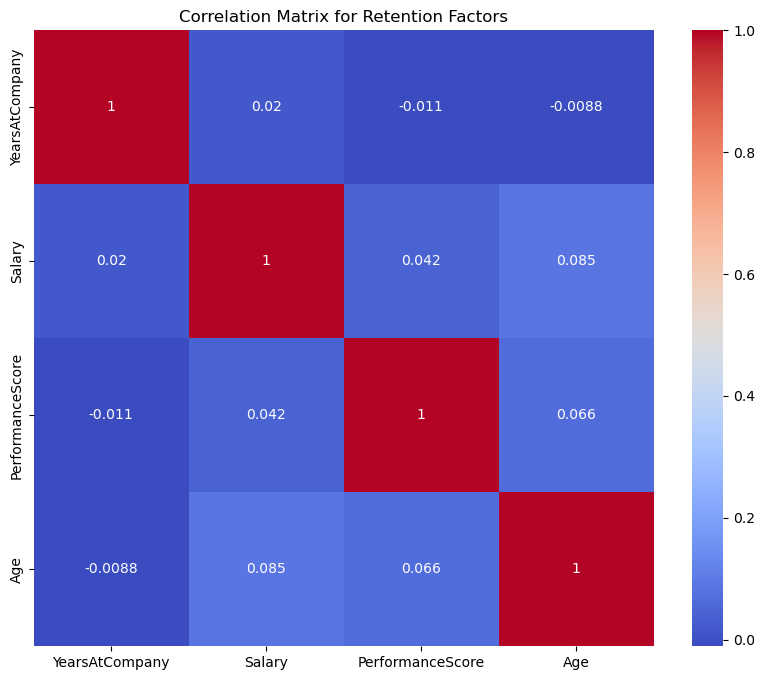

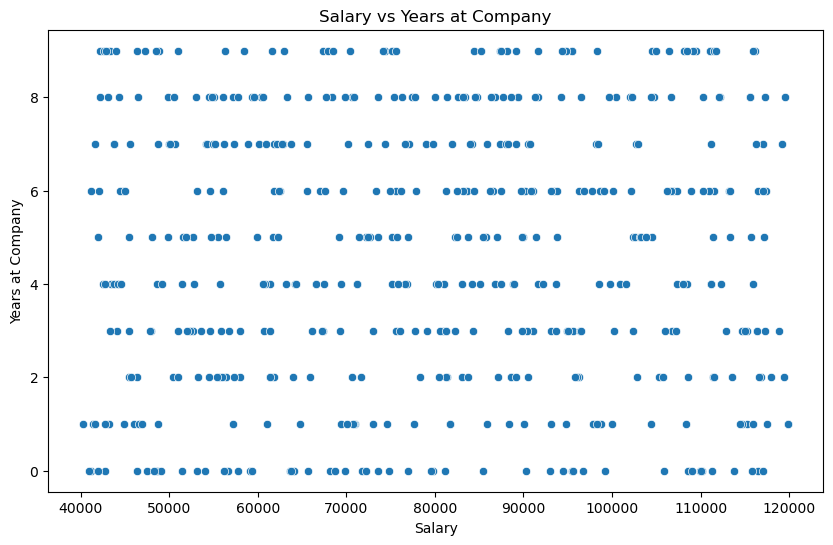

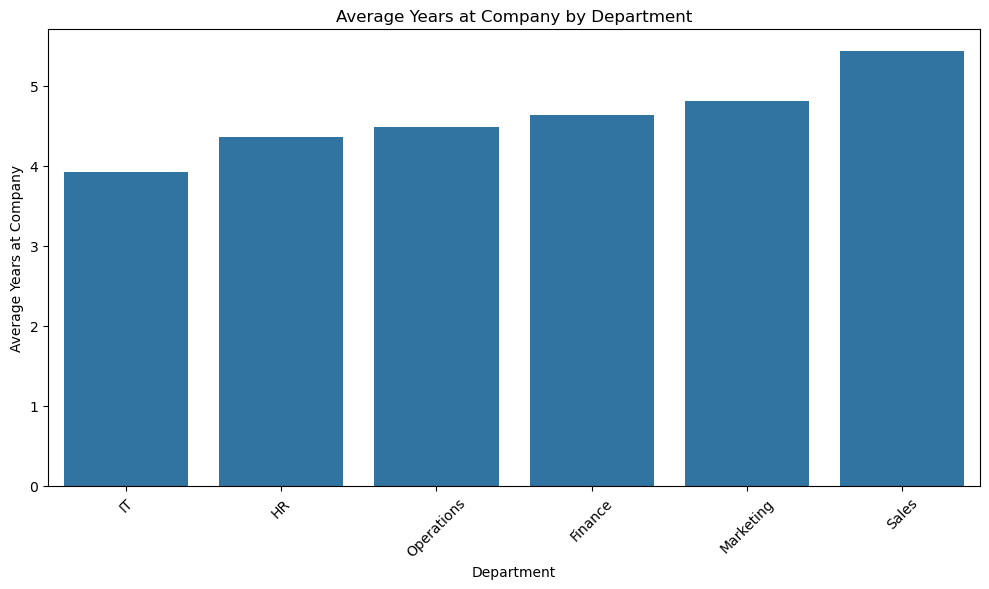

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Factors contributing to higher employee retention
correlation_matrix = hr_data[['YearsAtCompany', 'Salary', 'PerformanceScore', 'Age']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Retention Factors')
plt.savefig('retention_factors.png')


# Relationship between salary and years at the company
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='YearsAtCompany', data=hr_data)
plt.title('Salary vs Years at Company')
plt.xlabel('Salary')
plt.ylabel('Years at Company')
plt.savefig('salary_vs_years.png')


# Department turnover based on years at the company
dept_turnover = hr_data.groupby('Department')['YearsAtCompany'].mean().sort_values()
print("Average Years at Company by Department (Ascending Order):")
print(dept_turnover)

# Visualize department turnover
plt.figure(figsize=(10, 6))
sns.barplot(x=dept_turnover.index, y=dept_turnover.values)
plt.title('Average Years at Company by Department')
plt.xlabel('Department')
plt.ylabel('Average Years at Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('dept_turnover.png')


## Predictive Analysis 

Mean Squared Error for Performance Score Prediction: 2.794508
Accuracy for Employee Turnover Prediction: 1.0
Mean Squared Error for Salary Prediction: 498309227.01228994


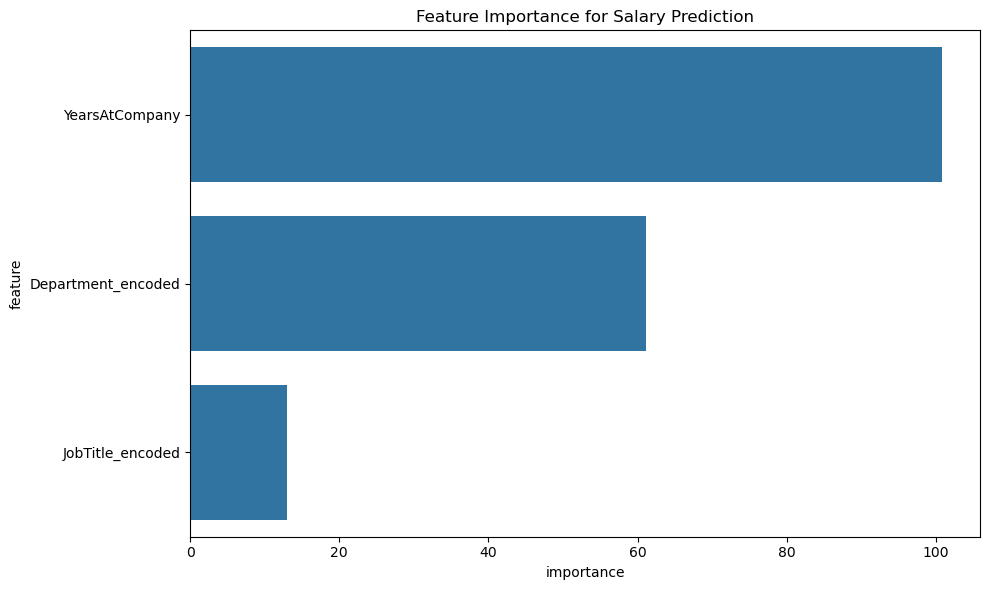

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
le = LabelEncoder()
hr_data['Department_encoded'] = le.fit_transform(hr_data['Department'])
hr_data['JobTitle_encoded'] = le.fit_transform(hr_data['JobTitle'])

# 1. Predict Performance Score
X = hr_data[['Salary', 'YearsAtCompany', 'Department_encoded']]
y = hr_data['PerformanceScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Performance Score Prediction: {mse}")

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Performance Score Prediction')
plt.tight_layout()
plt.savefig('performance_feature_importance.png')
plt.close()

# 2. Predict Employee Turnover
hr_data['HighTurnoverRisk'] = (hr_data['YearsAtCompany'] < hr_data['YearsAtCompany'].median()) & (hr_data['PerformanceScore'] < hr_data['PerformanceScore'].median())

X = hr_data[['YearsAtCompany', 'PerformanceScore']]
y = hr_data['HighTurnoverRisk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Employee Turnover Prediction: {accuracy}")

# 3. Salary Prediction
X = hr_data[['JobTitle_encoded', 'Department_encoded', 'YearsAtCompany']]
y = hr_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Salary Prediction: {mse}")

# Feature importance for salary prediction
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(lr_model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Salary Prediction')
plt.tight_layout()
plt.savefig('salary_feature_importance.png')


# Overall Insights from the HR Dataset

## Gender Analysis:
- There is variability in gender distribution across departments.
- Some job titles show significant salary disparities between genders.
- Gender distribution varies across different age groups.

## Hiring Trends:
- Hiring trends over the past 10 years show fluctuations in the number of hires each year.
- The Operations department has had the most hires in the last 5 years.
- There are noticeable seasonal trends in hiring, with certain months having higher hiring activity.

## Retention Analysis:
- Factors like salary, performance score, and age have varying degrees of correlation with employee retention.
- The IT department has the highest turnover, with the lowest average years at the company, while the Sales department has the highest retention.

## Predictive Analysis:
- The model for predicting performance scores shows a moderate mean squared error.
- The employee turnover prediction model effectively identifies high turnover risk employees.
- The salary prediction model indicates room for improvement in accuracy.

# Recommendations

## Address Gender Disparities:
- Implement policies to ensure equal pay for equal work across genders.
- Encourage diversity in departments with skewed gender distributions.

## Optimize Hiring Strategies:
- Focus on departments with high turnover for targeted hiring and retention strategies.
- Consider seasonal hiring trends to optimize recruitment efforts.

## Enhance Retention Programs:
- Develop retention programs for departments with high turnover, such as IT.
- Consider factors like salary and performance scores in retention strategies.

## Improve Predictive Models:
- Refine predictive models by incorporating additional features or data sources.
- Use insights from predictive analysis to proactively address potential turnover risks.
